In [1]:
%pip install mlflow pandas numpy matplotlib scikit-learn keras tensorflow-macos tensorflow-metal prometheus-api-client


[notice] A new release of pip is available: 24.2 -> 24.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlflow
import mlflow.keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score


In [3]:
# Carregar os dados
metric_df = pd.read_pickle("../data/ts.pkl")

# Resample para intervalos de 30 minutos
ts = metric_df["value"].astype(float).resample("30min").mean()

# Dividir em treino e teste
train = ts[:"2021-02-07"]
test = ts["2021-02-08":]

# Escalonar os dados
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Definir número de passos e features
n_steps = 40
n_features = 1

# Criar sequências para treino
X_train, y_train = [], []
for i in range(n_steps, len(train_scaled)):
    X_train.append(train_scaled[i-n_steps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape para 3D
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

# Criar sequências para teste
X_test, y_test = [], []
for j in range(n_steps, len(test_scaled)):
    X_test.append(test_scaled[j-n_steps:j, 0])
    y_test.append(test_scaled[j, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape para 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))

In [4]:
# Definir a URI do MLflow local
mlflow.set_tracking_uri("http://localhost:5001")

2024/10/27 12:49:25 INFO mlflow.tracking.fluent: Experiment with name 'Otimização com MRFO - LSTM - 01' does not exist. Creating a new experiment.
2024-10-27 12:49:25.558252: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-10-27 12:49:25.558282: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-10-27 12:49:25.558290: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-10-27 12:49:25.558306: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-27 12:49:25.558316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/wrosalem/Documents/0x0-Codi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
2024/10/27 12:49:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:49:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:49:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run sincere-fowl-470 at: http://localhost:5001/#/experiments/494006921194740655/runs/6693a0d817974ddeb5dfa24767f8f0f5.
2024/10/27 12:49:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/pyt

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


2024/10/27 12:49:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:49:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:49:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run sedate-lamb-271 at: http://localhost:5001/#/experiments/494006921194740655/runs/30d0f53818d54b6bb20c2b3169d5dccc.
2024/10/27 12:49:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


2024/10/27 12:49:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:50:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:50:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run peaceful-colt-25 at: http://localhost:5001/#/experiments/494006921194740655/runs/a93a0b0d08714ff0a18a27e92ac12506.
2024/10/27 12:50:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
2024/10/27 12:50:07 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:50:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:50:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run fearless-sloth-703 at: http://localhost:5001/#/experiments/494006921194740655/runs/1e06475b993d4052922849a5f402b29a.
2024/10/27 12:50:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/p

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


2024/10/27 12:50:14 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:50:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:50:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run nimble-smelt-711 at: http://localhost:5001/#/experiments/494006921194740655/runs/2251bff261bd4dd3ad48744c758f419a.
2024/10/27 12:50:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


2024/10/27 12:50:32 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:50:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:50:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run respected-bird-338 at: http://localhost:5001/#/experiments/494006921194740655/runs/7165549d4be440db98c98d6ea8da238b.
2024/10/27 12:50:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


2024/10/27 12:50:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:50:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:50:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run abundant-sow-518 at: http://localhost:5001/#/experiments/494006921194740655/runs/3aa5c8f1fbea40509bcb056581869934.
2024/10/27 12:50:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


2024/10/27 12:51:08 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:51:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:51:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run upset-shoat-244 at: http://localhost:5001/#/experiments/494006921194740655/runs/32d6efc09931471390137cbd0dd6cf93.
2024/10/27 12:51:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
2024/10/27 12:51:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:51:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:51:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run exultant-bee-258 at: http://localhost:5001/#/experiments/494006921194740655/runs/3dce209295054625ab81b8a71591f64b.
2024/10/27 12:51:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/pyt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


2024/10/27 12:51:27 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:51:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:51:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run auspicious-mole-499 at: http://localhost:5001/#/experiments/494006921194740655/runs/cbd283a56f594442843726cc2aab625f.
2024/10/27 12:51:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


2024/10/27 12:51:39 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:51:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:51:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run peaceful-cod-389 at: http://localhost:5001/#/experiments/494006921194740655/runs/23c496b8d6724bc690429953b8968478.
2024/10/27 12:51:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


2024/10/27 12:51:54 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:51:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:51:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run traveling-loon-0 at: http://localhost:5001/#/experiments/494006921194740655/runs/d88656b4495048e1a7c039af37ffa29d.
2024/10/27 12:51:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


2024/10/27 12:52:03 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:52:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:52:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run lyrical-bird-828 at: http://localhost:5001/#/experiments/494006921194740655/runs/42dc6c5bac684030ab6b6511254c0a22.
2024/10/27 12:52:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
2024/10/27 12:52:15 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:52:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:52:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run capable-trout-509 at: http://localhost:5001/#/experiments/494006921194740655/runs/3a2ca8d9935f4005bb976fe5ab555807.
2024/10/27 12:52:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/py

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


2024/10/27 12:52:28 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:52:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:52:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run respected-owl-347 at: http://localhost:5001/#/experiments/494006921194740655/runs/6a77d70af48f4045bbf68e23ea3a60ea.
2024/10/27 12:52:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


2024/10/27 12:52:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:52:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:52:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run brawny-tern-783 at: http://localhost:5001/#/experiments/494006921194740655/runs/4a7d0f1c7014497eb8e409e92d465705.
2024/10/27 12:52:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


2024/10/27 12:53:11 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:53:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:53:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-sow-691 at: http://localhost:5001/#/experiments/494006921194740655/runs/11459a2e3e6e4fe6be0dbc4015c60c8f.
2024/10/27 12:53:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


2024/10/27 12:53:26 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:53:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:53:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run polite-horse-711 at: http://localhost:5001/#/experiments/494006921194740655/runs/f39b23a25586423ca75cbb1c46983aaf.
2024/10/27 12:53:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


2024/10/27 12:53:35 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:53:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:53:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run ambitious-mink-656 at: http://localhost:5001/#/experiments/494006921194740655/runs/58bda2cffc5d4c689399be223ccaf0b7.
2024/10/27 12:53:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


2024/10/27 12:53:50 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:53:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:53:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run delightful-panda-161 at: http://localhost:5001/#/experiments/494006921194740655/runs/27f3c9ff55bb459cbc42051cd6c1e330.
2024/10/27 12:53:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs

Iteração 1/20, Melhor Fitness (RMSE): 20936377.8760
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


2024/10/27 12:54:13 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:54:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:54:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run handsome-elk-874 at: http://localhost:5001/#/experiments/494006921194740655/runs/2f34df7077ec42ae996721f17b568444.
2024/10/27 12:54:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


2024/10/27 12:54:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:54:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:54:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run spiffy-croc-185 at: http://localhost:5001/#/experiments/494006921194740655/runs/24728f8dd2a0486e9f0ee7c4d6e59fc5.
2024/10/27 12:54:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


2024/10/27 12:54:41 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:54:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:54:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run debonair-gnat-858 at: http://localhost:5001/#/experiments/494006921194740655/runs/a0b075ab6e774c68b739b72235c51d6b.
2024/10/27 12:54:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


2024/10/27 12:54:46 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:54:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:54:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run bright-mole-925 at: http://localhost:5001/#/experiments/494006921194740655/runs/b2bd4660635c49be9584949ff0b184a7.
2024/10/27 12:54:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


2024/10/27 12:55:27 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:55:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:55:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run calm-sow-963 at: http://localhost:5001/#/experiments/494006921194740655/runs/272f424f1b2947a0959288e14b14c713.
2024/10/27 12:55:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


2024/10/27 12:55:45 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:55:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:55:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run grandiose-shoat-753 at: http://localhost:5001/#/experiments/494006921194740655/runs/af48b08c247546f691dc60e2dc7450c4.
2024/10/27 12:55:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


2024/10/27 12:56:07 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:56:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:56:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run clumsy-lark-619 at: http://localhost:5001/#/experiments/494006921194740655/runs/74263f7e5e644187bb9a067c3499b0fa.
2024/10/27 12:56:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


2024/10/27 12:56:13 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:56:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:56:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run rumbling-zebra-454 at: http://localhost:5001/#/experiments/494006921194740655/runs/680fa52d2fd54ad088de80685d03722e.
2024/10/27 12:56:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


2024/10/27 12:56:27 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:56:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:56:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run smiling-mare-311 at: http://localhost:5001/#/experiments/494006921194740655/runs/55b5b897bfe746b8b90a4dbfb58e4454.
2024/10/27 12:56:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


2024/10/27 12:56:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:56:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:56:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run clumsy-ram-993 at: http://localhost:5001/#/experiments/494006921194740655/runs/424afde91c1b4a13b254baf85e826264.
2024/10/27 12:56:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 2/20, Melhor Fitness (RMSE): 20936377.8760
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


2024/10/27 12:56:46 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:56:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:56:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run likeable-kite-744 at: http://localhost:5001/#/experiments/494006921194740655/runs/8f21b23b432f48479a2e692dae3c56fc.
2024/10/27 12:56:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


2024/10/27 12:57:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:57:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:57:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run capable-owl-259 at: http://localhost:5001/#/experiments/494006921194740655/runs/3b8145fd4e2c45ff88234f760686ce85.
2024/10/27 12:57:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


2024/10/27 12:57:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:57:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:57:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run treasured-goat-31 at: http://localhost:5001/#/experiments/494006921194740655/runs/b6202babd65e4efbacdec0cf9d4f6774.
2024/10/27 12:57:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


2024/10/27 12:57:41 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:57:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:57:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run worried-shrimp-840 at: http://localhost:5001/#/experiments/494006921194740655/runs/dfa9bfab18c4438cbb7b65424be0cb53.
2024/10/27 12:57:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


2024/10/27 12:57:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:57:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:57:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run chill-fawn-28 at: http://localhost:5001/#/experiments/494006921194740655/runs/683a629ea90847068678b9bad4378041.
2024/10/27 12:57:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


2024/10/27 12:58:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:58:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:58:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run upset-deer-652 at: http://localhost:5001/#/experiments/494006921194740655/runs/9e27fc62b8804606a8e1c92b2f34efe6.
2024/10/27 12:58:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


2024/10/27 12:58:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:58:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:58:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run debonair-rat-343 at: http://localhost:5001/#/experiments/494006921194740655/runs/b9e1eee6e7084f0aab4a76e9746ad8c2.
2024/10/27 12:58:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


2024/10/27 12:58:45 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:58:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:58:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run exultant-squid-749 at: http://localhost:5001/#/experiments/494006921194740655/runs/e9668d7347154ed3a380c800417d8eed.
2024/10/27 12:58:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


2024/10/27 12:59:14 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:59:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:59:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run awesome-roo-579 at: http://localhost:5001/#/experiments/494006921194740655/runs/8eb598c1f0e048ab8810034f00bc6a58.
2024/10/27 12:59:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


2024/10/27 12:59:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:59:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:59:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run powerful-hound-19 at: http://localhost:5001/#/experiments/494006921194740655/runs/316a020dbd0d4cd79ce7c323d1bc2199.
2024/10/27 12:59:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 3/20, Melhor Fitness (RMSE): 20936377.8760
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


2024/10/27 12:59:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:59:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:59:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run sedate-lamb-529 at: http://localhost:5001/#/experiments/494006921194740655/runs/461c7102b2484ad39ddcc4c59583dfb5.
2024/10/27 12:59:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


2024/10/27 12:59:48 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:59:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:59:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run respected-pig-577 at: http://localhost:5001/#/experiments/494006921194740655/runs/90a30358cfe74c3cb71ccce94a728690.
2024/10/27 12:59:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


2024/10/27 12:59:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 12:59:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 12:59:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run intrigued-mule-446 at: http://localhost:5001/#/experiments/494006921194740655/runs/8e25bc03ebcd42e2bb21eb950e8bb5ab.
2024/10/27 12:59:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


2024/10/27 13:00:01 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:00:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:00:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run crawling-cub-680 at: http://localhost:5001/#/experiments/494006921194740655/runs/80c47f7fc7d64f46994188fc6d534e70.
2024/10/27 13:00:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


2024/10/27 13:00:21 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:00:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:00:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run peaceful-squid-781 at: http://localhost:5001/#/experiments/494006921194740655/runs/51ca8ac0a5714a8ebd39e0f131ff8421.
2024/10/27 13:00:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


2024/10/27 13:00:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:00:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:00:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run silent-bear-22 at: http://localhost:5001/#/experiments/494006921194740655/runs/b0f2d4c6e8614c25bb50a74b21e5f7bf.
2024/10/27 13:00:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


2024/10/27 13:01:12 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:01:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:01:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run ambitious-roo-100 at: http://localhost:5001/#/experiments/494006921194740655/runs/6188ef8395874cada1738e9a900815f0.
2024/10/27 13:01:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


2024/10/27 13:01:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:01:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:01:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run indecisive-stoat-988 at: http://localhost:5001/#/experiments/494006921194740655/runs/f85198edefbc4502855b8a7fb032c552.
2024/10/27 13:01:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


2024/10/27 13:02:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:02:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:02:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run masked-dove-729 at: http://localhost:5001/#/experiments/494006921194740655/runs/910c4f0c85a341d4916f3497cf086bf3.
2024/10/27 13:02:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


2024/10/27 13:02:05 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:02:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:02:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-trout-318 at: http://localhost:5001/#/experiments/494006921194740655/runs/a5766d5f4b914351ae79cc5059a1903d.
2024/10/27 13:02:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 4/20, Melhor Fitness (RMSE): 20936377.8760
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


2024/10/27 13:02:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:02:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:02:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run useful-lark-795 at: http://localhost:5001/#/experiments/494006921194740655/runs/5df4c7d414134cdaa9fc780ccd59fabc.
2024/10/27 13:02:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


2024/10/27 13:03:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:03:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:03:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run redolent-fox-173 at: http://localhost:5001/#/experiments/494006921194740655/runs/e3d38753c17245d4ae13c7d0e653a7ae.
2024/10/27 13:03:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


2024/10/27 13:03:05 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:03:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:03:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run selective-cow-364 at: http://localhost:5001/#/experiments/494006921194740655/runs/4c9c01c9038a44dbba3ae1c9230c5769.
2024/10/27 13:03:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:03:16 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:03:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:03:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run luxuriant-crane-692 at: http://localhost:5001/#/experiments/494006921194740655/runs/0c76e945ffcb45a6bed4346c3df297a2.
2024/10/27 13:03:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


2024/10/27 13:03:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:03:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:03:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run bemused-mink-149 at: http://localhost:5001/#/experiments/494006921194740655/runs/5cec2e0017594e489560f67734f35ee4.
2024/10/27 13:03:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


2024/10/27 13:03:46 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:03:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:03:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run placid-ant-127 at: http://localhost:5001/#/experiments/494006921194740655/runs/a90479557bc34341a71c1e999380b1cb.
2024/10/27 13:03:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


2024/10/27 13:03:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:04:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:04:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run thundering-snake-193 at: http://localhost:5001/#/experiments/494006921194740655/runs/1549f2c46c5644e6993f3531982e324e.
2024/10/27 13:04:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


2024/10/27 13:04:09 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:04:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:04:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run flawless-snipe-608 at: http://localhost:5001/#/experiments/494006921194740655/runs/0b9824c435e7408b8c5803434ed07e43.
2024/10/27 13:04:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


2024/10/27 13:04:52 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:04:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:04:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run unequaled-foal-62 at: http://localhost:5001/#/experiments/494006921194740655/runs/9a91f45e6cd5447797f660881256210c.
2024/10/27 13:04:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


2024/10/27 13:05:11 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:05:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:05:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run painted-loon-786 at: http://localhost:5001/#/experiments/494006921194740655/runs/f2c16f8646af4a95ba23ac581c921a22.
2024/10/27 13:05:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 5/20, Melhor Fitness (RMSE): 19503429.1654
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:05:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:05:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:05:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run orderly-steed-621 at: http://localhost:5001/#/experiments/494006921194740655/runs/2351cab6aaa24d8cb3bd542194688aee.
2024/10/27 13:05:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


2024/10/27 13:05:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:05:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:05:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run monumental-ram-758 at: http://localhost:5001/#/experiments/494006921194740655/runs/a6bcbe72bba645afb49446f00e14b603.
2024/10/27 13:05:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


2024/10/27 13:05:42 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:05:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:05:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run righteous-fish-878 at: http://localhost:5001/#/experiments/494006921194740655/runs/822ab2d67d5c46b791d099e137967d86.
2024/10/27 13:05:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


2024/10/27 13:05:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:05:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:05:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run unleashed-bass-150 at: http://localhost:5001/#/experiments/494006921194740655/runs/71c098e3005d41588ef93838588dfc86.
2024/10/27 13:05:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:05:56 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:05:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:05:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run rambunctious-hen-936 at: http://localhost:5001/#/experiments/494006921194740655/runs/3b47544df7314f578f59fad6dacae416.
2024/10/27 13:05:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


2024/10/27 13:06:19 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:06:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:06:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run adorable-lamb-587 at: http://localhost:5001/#/experiments/494006921194740655/runs/eb01c6c496394e30b719a0c657279a37.
2024/10/27 13:06:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


2024/10/27 13:06:42 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:06:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:06:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run whimsical-snail-164 at: http://localhost:5001/#/experiments/494006921194740655/runs/20ad02eaae4f4620b8e15641c6534f4a.
2024/10/27 13:06:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


2024/10/27 13:06:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:06:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:06:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run resilient-doe-835 at: http://localhost:5001/#/experiments/494006921194740655/runs/f6fbd4c48dda44dbad6332f70a48f2b7.
2024/10/27 13:06:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


2024/10/27 13:07:29 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:07:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:07:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run abundant-gnu-415 at: http://localhost:5001/#/experiments/494006921194740655/runs/eb662479dda54f01b5e2ef0b655d0194.
2024/10/27 13:07:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:08:13 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:08:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:08:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run monumental-shrimp-99 at: http://localhost:5001/#/experiments/494006921194740655/runs/90871e87bfff446b925db3ca8a15fc59.
2024/10/27 13:08:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs

Iteração 6/20, Melhor Fitness (RMSE): 18062842.3155
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


2024/10/27 13:08:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:08:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:08:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run languid-fawn-756 at: http://localhost:5001/#/experiments/494006921194740655/runs/4a87714d50b847a7b95ac50b7c953d42.
2024/10/27 13:08:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


2024/10/27 13:09:29 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:09:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:09:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run bold-hawk-10 at: http://localhost:5001/#/experiments/494006921194740655/runs/8a919692157046e594273ebec53371ce.
2024/10/27 13:09:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


2024/10/27 13:10:09 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:10:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:10:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run brawny-hound-224 at: http://localhost:5001/#/experiments/494006921194740655/runs/440c53afa0e94239b9e6ca3fe23764ef.
2024/10/27 13:10:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


2024/10/27 13:10:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:10:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:10:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run righteous-hen-600 at: http://localhost:5001/#/experiments/494006921194740655/runs/e334759c807947019c50ba8de50c97a2.
2024/10/27 13:10:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


2024/10/27 13:10:52 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:10:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:10:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run sincere-steed-376 at: http://localhost:5001/#/experiments/494006921194740655/runs/58df2161a614471a8df211a0aa125d8d.
2024/10/27 13:10:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


2024/10/27 13:11:26 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:11:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:11:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run adaptable-flea-403 at: http://localhost:5001/#/experiments/494006921194740655/runs/abaab559136b48bd859bd67f8c210834.
2024/10/27 13:11:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


2024/10/27 13:12:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:12:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:12:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run auspicious-fox-326 at: http://localhost:5001/#/experiments/494006921194740655/runs/33269d7bfb1d4c0482fcbf03f9caee30.
2024/10/27 13:12:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


2024/10/27 13:15:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:15:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:15:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run peaceful-mink-109 at: http://localhost:5001/#/experiments/494006921194740655/runs/5baa1ab8ce2d4e178a19022ec4b7625f.
2024/10/27 13:15:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


2024/10/27 13:16:26 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:16:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:16:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run treasured-trout-378 at: http://localhost:5001/#/experiments/494006921194740655/runs/9e05a74aefb44c2998f26220dd91aec4.
2024/10/27 13:16:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


2024/10/27 13:16:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:16:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:16:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run sedate-yak-282 at: http://localhost:5001/#/experiments/494006921194740655/runs/1262fb7bb95647e0ab75fc169b717d26.
2024/10/27 13:16:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 7/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


2024/10/27 13:16:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:16:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:16:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run polite-chimp-506 at: http://localhost:5001/#/experiments/494006921194740655/runs/053abd7b9aaa45c5a95dfae8c375efba.
2024/10/27 13:16:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


2024/10/27 13:17:09 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:17:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:17:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run adorable-sheep-7 at: http://localhost:5001/#/experiments/494006921194740655/runs/112551dee90c48979096024ebeb44d85.
2024/10/27 13:17:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


2024/10/27 13:17:23 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:17:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:17:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run bald-deer-170 at: http://localhost:5001/#/experiments/494006921194740655/runs/87513222e191407b8e8b61c216bda70e.
2024/10/27 13:17:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


2024/10/27 13:17:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:17:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:17:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run gifted-bird-20 at: http://localhost:5001/#/experiments/494006921194740655/runs/2fd61fa2a58c4f599251e27d23246667.
2024/10/27 13:17:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


2024/10/27 13:17:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:17:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:17:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run luminous-calf-216 at: http://localhost:5001/#/experiments/494006921194740655/runs/e060c550674c4323a5bbde0774a47bac.
2024/10/27 13:17:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


2024/10/27 13:17:50 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:17:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:17:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run merciful-swan-429 at: http://localhost:5001/#/experiments/494006921194740655/runs/c2d81fbf67ca4a6e876966bd7446fc89.
2024/10/27 13:17:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


2024/10/27 13:17:56 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:17:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:17:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run selective-perch-429 at: http://localhost:5001/#/experiments/494006921194740655/runs/219178c0ebb248799776b9878b54d064.
2024/10/27 13:17:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


2024/10/27 13:18:19 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:18:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:18:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run charming-yak-654 at: http://localhost:5001/#/experiments/494006921194740655/runs/952cb1272e1b41d6b645d37f183cd6ea.
2024/10/27 13:18:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


2024/10/27 13:18:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:18:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:18:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run mysterious-duck-195 at: http://localhost:5001/#/experiments/494006921194740655/runs/778a51d4205745a488870415747ff590.
2024/10/27 13:18:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


2024/10/27 13:18:50 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:18:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:18:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run mercurial-horse-105 at: http://localhost:5001/#/experiments/494006921194740655/runs/02661e16513b4c2987f958d478ede1a5.
2024/10/27 13:18:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

Iteração 8/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


2024/10/27 13:18:57 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:19:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:19:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run suave-sow-964 at: http://localhost:5001/#/experiments/494006921194740655/runs/5448bc2797ef461dbdc49bc6c4abdc85.
2024/10/27 13:19:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


2024/10/27 13:19:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:19:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:19:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run sedate-seal-562 at: http://localhost:5001/#/experiments/494006921194740655/runs/34da7f1e3c9d493daacd52947a71a09f.
2024/10/27 13:19:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


2024/10/27 13:19:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:19:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:19:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run legendary-bass-846 at: http://localhost:5001/#/experiments/494006921194740655/runs/f078b52554fa40b4a39721d1063cc5ea.
2024/10/27 13:19:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


2024/10/27 13:19:56 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:19:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:19:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-fly-751 at: http://localhost:5001/#/experiments/494006921194740655/runs/9cb871eabf0e4fcda3a7eb9fdbcb0d55.
2024/10/27 13:19:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:20:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:20:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:20:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run colorful-croc-233 at: http://localhost:5001/#/experiments/494006921194740655/runs/d59dd4dff2534193b08f7dec99ece168.
2024/10/27 13:20:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:21:14 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:21:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:21:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run masked-jay-259 at: http://localhost:5001/#/experiments/494006921194740655/runs/b53e04e57c88418c85029b67c60283a7.
2024/10/27 13:21:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:21:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:21:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:21:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run colorful-cow-659 at: http://localhost:5001/#/experiments/494006921194740655/runs/392b76c0d5cf41f2bc4a9442f2fea0b3.
2024/10/27 13:21:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


2024/10/27 13:21:46 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:21:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:21:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run adaptable-sloth-635 at: http://localhost:5001/#/experiments/494006921194740655/runs/f44fbdd0c32440eeb748360e1b761e6e.
2024/10/27 13:21:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


2024/10/27 13:21:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:21:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:21:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run crawling-auk-390 at: http://localhost:5001/#/experiments/494006921194740655/runs/89d70a41357d4b9e93ba2c04eac9bb62.
2024/10/27 13:21:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


2024/10/27 13:22:03 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:22:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:22:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run fearless-penguin-932 at: http://localhost:5001/#/experiments/494006921194740655/runs/404cebf4f30d4d31a8c598d60f413d81.
2024/10/27 13:22:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs

Iteração 9/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


2024/10/27 13:22:32 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:22:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:22:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run bold-hog-944 at: http://localhost:5001/#/experiments/494006921194740655/runs/9bb54c0ced384a38b2bf661b88001368.
2024/10/27 13:22:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


2024/10/27 13:22:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:23:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:23:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run inquisitive-ram-764 at: http://localhost:5001/#/experiments/494006921194740655/runs/1296f47f1ae14a41ae3d7d20ed7393f6.
2024/10/27 13:23:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


2024/10/27 13:23:19 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:23:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:23:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run clean-shrike-152 at: http://localhost:5001/#/experiments/494006921194740655/runs/a6d6d3722e614176ad20851f8f05605e.
2024/10/27 13:23:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


2024/10/27 13:23:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:23:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:23:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run unleashed-hen-621 at: http://localhost:5001/#/experiments/494006921194740655/runs/4b182a2e4ef94b228a8c34a9441d7526.
2024/10/27 13:23:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


2024/10/27 13:23:46 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:23:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:23:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run resilient-midge-377 at: http://localhost:5001/#/experiments/494006921194740655/runs/a9be7ceaa5194e378f4f9a2a67c9f7a2.
2024/10/27 13:23:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


2024/10/27 13:23:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:24:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:24:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run painted-perch-161 at: http://localhost:5001/#/experiments/494006921194740655/runs/2a796c2087594adf88bad346d518a80f.
2024/10/27 13:24:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


2024/10/27 13:24:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:24:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:24:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-sponge-517 at: http://localhost:5001/#/experiments/494006921194740655/runs/9922e3b455b5450fa601d12e73fa2603.
2024/10/27 13:24:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


2024/10/27 13:24:19 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:24:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:24:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run likeable-mole-528 at: http://localhost:5001/#/experiments/494006921194740655/runs/b0e621d6897d41e9a5b21dac9d0ebf72.
2024/10/27 13:24:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


2024/10/27 13:24:27 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:24:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:24:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run dashing-lark-530 at: http://localhost:5001/#/experiments/494006921194740655/runs/152abddaac5545f08a5a3b40a5ce0663.
2024/10/27 13:24:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


2024/10/27 13:24:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:24:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:24:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run bedecked-fawn-494 at: http://localhost:5001/#/experiments/494006921194740655/runs/fd9af66efb964f38a3fb3a3d7ab43069.
2024/10/27 13:24:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 10/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


2024/10/27 13:24:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:24:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:24:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run wistful-smelt-946 at: http://localhost:5001/#/experiments/494006921194740655/runs/d3442dce2fba4368a3530958f5f61952.
2024/10/27 13:24:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


2024/10/27 13:25:07 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:25:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:25:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run aged-hawk-126 at: http://localhost:5001/#/experiments/494006921194740655/runs/12b373727e3447c5966ca98a914d4dcb.
2024/10/27 13:25:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


2024/10/27 13:25:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:25:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:25:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run fearless-robin-495 at: http://localhost:5001/#/experiments/494006921194740655/runs/0f239aad2e9f49958e5db05b9e4b11e6.
2024/10/27 13:25:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


2024/10/27 13:25:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:25:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:25:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run salty-snipe-998 at: http://localhost:5001/#/experiments/494006921194740655/runs/15808fccf8414c6c8a31c2e03a6c01a6.
2024/10/27 13:25:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


2024/10/27 13:26:23 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:26:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:26:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run burly-conch-898 at: http://localhost:5001/#/experiments/494006921194740655/runs/505fc9af0dc54260925050f8560cc5fb.
2024/10/27 13:26:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


2024/10/27 13:27:01 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:27:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:27:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run amusing-wren-43 at: http://localhost:5001/#/experiments/494006921194740655/runs/386fc2ac79aa4c808ca45b666bae3354.
2024/10/27 13:27:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


2024/10/27 13:27:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:27:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:27:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run bedecked-hare-331 at: http://localhost:5001/#/experiments/494006921194740655/runs/1ef26d95f134473ba6972b4fe8f3d9d4.
2024/10/27 13:27:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


2024/10/27 13:27:51 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:27:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:27:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run agreeable-seal-107 at: http://localhost:5001/#/experiments/494006921194740655/runs/731327033c364b1792fbd49e29c01380.
2024/10/27 13:27:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


2024/10/27 13:28:23 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:28:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:28:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run overjoyed-stork-513 at: http://localhost:5001/#/experiments/494006921194740655/runs/0548fcd88ab04bf8adecb076640df6a5.
2024/10/27 13:28:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


2024/10/27 13:28:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:28:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:28:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run dapper-goat-701 at: http://localhost:5001/#/experiments/494006921194740655/runs/ffd51a87e76c423a83e156257ea329d9.
2024/10/27 13:28:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 11/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


2024/10/27 13:28:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:28:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:28:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run bold-fly-869 at: http://localhost:5001/#/experiments/494006921194740655/runs/f0f316c102d14057af835648ab6f5607.
2024/10/27 13:28:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


2024/10/27 13:29:05 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:29:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:29:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run suave-gnu-407 at: http://localhost:5001/#/experiments/494006921194740655/runs/25af7df077d849ec85c310d17ca145d0.
2024/10/27 13:29:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


2024/10/27 13:29:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:29:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:29:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run awesome-crab-453 at: http://localhost:5001/#/experiments/494006921194740655/runs/bddb18ec5f304ad981c3c430ca0c00a0.
2024/10/27 13:29:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


2024/10/27 13:29:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:29:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:29:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run mysterious-shoat-3 at: http://localhost:5001/#/experiments/494006921194740655/runs/d8b7cd6de6284e8682dad66b34fd7b9c.
2024/10/27 13:29:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


2024/10/27 13:30:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:30:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:30:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run caring-panda-58 at: http://localhost:5001/#/experiments/494006921194740655/runs/48ad0c543f2246acbab1822b77b99e36.
2024/10/27 13:30:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:30:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:30:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:30:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run trusting-mink-849 at: http://localhost:5001/#/experiments/494006921194740655/runs/07b02fe39ff64908b0ce1e2312abab73.
2024/10/27 13:30:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


2024/10/27 13:30:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:30:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:30:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run learned-ray-825 at: http://localhost:5001/#/experiments/494006921194740655/runs/fe8f53f6f810445cb3736b66472eb6fb.
2024/10/27 13:30:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


2024/10/27 13:31:21 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:31:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:31:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run kindly-dove-776 at: http://localhost:5001/#/experiments/494006921194740655/runs/6a1a3de6bcd147dc8228ec8ca19fdc81.
2024/10/27 13:31:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


2024/10/27 13:31:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:31:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:31:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run useful-sponge-84 at: http://localhost:5001/#/experiments/494006921194740655/runs/f1a69e5433b445e28f874c6a3cde784c.
2024/10/27 13:31:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


2024/10/27 13:32:12 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:32:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:32:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run bouncy-pug-122 at: http://localhost:5001/#/experiments/494006921194740655/runs/c59b4788f9bc49908ee83660efd15d65.
2024/10/27 13:32:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 12/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


2024/10/27 13:32:21 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:32:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:32:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run aged-sponge-67 at: http://localhost:5001/#/experiments/494006921194740655/runs/e91cd32283a34dcc95d9d871bd905927.
2024/10/27 13:32:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


2024/10/27 13:32:46 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:32:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:32:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run unleashed-bird-109 at: http://localhost:5001/#/experiments/494006921194740655/runs/6c9da748aaf74b96bfed47689e8d18b2.
2024/10/27 13:32:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


2024/10/27 13:33:11 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:33:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:33:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run rebellious-crab-380 at: http://localhost:5001/#/experiments/494006921194740655/runs/ade322b1e25c48b5b9d961ae81e27775.
2024/10/27 13:33:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:33:33 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:33:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:33:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run intrigued-swan-900 at: http://localhost:5001/#/experiments/494006921194740655/runs/d8fdb279d4444898afe1f4b1047b5cf2.
2024/10/27 13:33:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


2024/10/27 13:33:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:33:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:33:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run able-skink-116 at: http://localhost:5001/#/experiments/494006921194740655/runs/90ec6d73622b49b09587afa6eabe0971.
2024/10/27 13:33:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


2024/10/27 13:34:08 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:34:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:34:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run respected-grub-993 at: http://localhost:5001/#/experiments/494006921194740655/runs/5e5e4a6b883e420994963b450ecbf35c.
2024/10/27 13:34:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


2024/10/27 13:34:46 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:34:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:34:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run fearless-hare-586 at: http://localhost:5001/#/experiments/494006921194740655/runs/388c23de20f1480180ac4ad5b397ae5c.
2024/10/27 13:34:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:35:13 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:35:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:35:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run caring-swan-520 at: http://localhost:5001/#/experiments/494006921194740655/runs/7ef053292bd242d79aa52993f4afad06.
2024/10/27 13:35:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


2024/10/27 13:35:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:35:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:35:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run unleashed-snake-488 at: http://localhost:5001/#/experiments/494006921194740655/runs/5b7b2393c39341a9ba5f3d076b255957.
2024/10/27 13:35:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


2024/10/27 13:36:01 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:36:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:36:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run upbeat-fawn-119 at: http://localhost:5001/#/experiments/494006921194740655/runs/2a321b307e034588bb88401bf305bfee.
2024/10/27 13:36:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 13/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


2024/10/27 13:36:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:36:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:36:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run carefree-hog-953 at: http://localhost:5001/#/experiments/494006921194740655/runs/ca44845481da4e92b67cfc91f8bf527e.
2024/10/27 13:36:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


2024/10/27 13:36:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:36:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:36:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run stately-snail-363 at: http://localhost:5001/#/experiments/494006921194740655/runs/56bb4840359e4ab4bc353e10a7864907.
2024/10/27 13:36:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


2024/10/27 13:37:28 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:37:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:37:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run polite-croc-272 at: http://localhost:5001/#/experiments/494006921194740655/runs/a8c8bda352b240c29e3e8ad31501b239.
2024/10/27 13:37:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


2024/10/27 13:37:39 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:37:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:37:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run upbeat-worm-118 at: http://localhost:5001/#/experiments/494006921194740655/runs/319a5b4158b440f0b2cbbe0c128866b9.
2024/10/27 13:37:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


2024/10/27 13:37:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:37:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:37:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run dapper-elk-786 at: http://localhost:5001/#/experiments/494006921194740655/runs/6ebb7ff18a3644abb3962f131fdd1394.
2024/10/27 13:37:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


2024/10/27 13:38:32 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:38:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:38:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run brawny-ape-297 at: http://localhost:5001/#/experiments/494006921194740655/runs/5e8e2639e5494e0ea036751867cc1ac1.
2024/10/27 13:38:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


2024/10/27 13:39:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:39:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:39:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run whimsical-frog-24 at: http://localhost:5001/#/experiments/494006921194740655/runs/17969d64f9274c8d972b58aa7cd06ece.
2024/10/27 13:39:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


2024/10/27 13:39:07 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:39:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:39:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run efficient-shoat-877 at: http://localhost:5001/#/experiments/494006921194740655/runs/308e62a25a574bff8697205edf097aa4.
2024/10/27 13:39:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


2024/10/27 13:39:15 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:39:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:39:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run intrigued-roo-880 at: http://localhost:5001/#/experiments/494006921194740655/runs/456bf2f47c3b46c094f5d5f9fb9717de.
2024/10/27 13:39:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


2024/10/27 13:40:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:40:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:40:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run debonair-loon-579 at: http://localhost:5001/#/experiments/494006921194740655/runs/336224f76f834941a98598ad344c6ccd.
2024/10/27 13:40:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 14/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


2024/10/27 13:40:07 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:40:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:40:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run handsome-colt-454 at: http://localhost:5001/#/experiments/494006921194740655/runs/f3eaba8ade534215955076c341911de0.
2024/10/27 13:40:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


2024/10/27 13:40:14 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:40:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:40:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run enthused-eel-130 at: http://localhost:5001/#/experiments/494006921194740655/runs/d71e49a51e8742e0ac3f80ab42c8b5c7.
2024/10/27 13:40:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:40:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:40:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:40:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run zealous-stork-491 at: http://localhost:5001/#/experiments/494006921194740655/runs/932707d959ad4aedbec7d5135ed251b7.
2024/10/27 13:40:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


2024/10/27 13:40:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:40:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:40:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run defiant-eel-917 at: http://localhost:5001/#/experiments/494006921194740655/runs/7a610671bd844ceaab26d6e6d37c3428.
2024/10/27 13:40:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


2024/10/27 13:40:59 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:41:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:41:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run zealous-sponge-728 at: http://localhost:5001/#/experiments/494006921194740655/runs/0088ddbb33d549e884c39e5e26adf1a1.
2024/10/27 13:41:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


2024/10/27 13:41:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:41:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:41:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run abundant-bat-82 at: http://localhost:5001/#/experiments/494006921194740655/runs/fb88f6ffb9114543962041036c24e313.
2024/10/27 13:41:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


2024/10/27 13:41:28 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:41:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:41:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run silent-snipe-557 at: http://localhost:5001/#/experiments/494006921194740655/runs/7ba742b7a6ec44508f2e33cf71049653.
2024/10/27 13:41:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


2024/10/27 13:41:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:41:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:41:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run funny-panda-818 at: http://localhost:5001/#/experiments/494006921194740655/runs/e6661ac322334428b2b54d8c2fcb006d.
2024/10/27 13:41:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


2024/10/27 13:42:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:42:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:42:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run clumsy-vole-600 at: http://localhost:5001/#/experiments/494006921194740655/runs/39053c8d415b429eb2419cba53109b6a.
2024/10/27 13:42:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


2024/10/27 13:42:23 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:42:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:42:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run respected-croc-396 at: http://localhost:5001/#/experiments/494006921194740655/runs/91119415b7514a3f8bfeea0d0357f3a5.
2024/10/27 13:42:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 15/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


2024/10/27 13:42:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:42:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:42:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run welcoming-tern-658 at: http://localhost:5001/#/experiments/494006921194740655/runs/4098d846362c47a48f0fb239c25e85bc.
2024/10/27 13:42:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


2024/10/27 13:42:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:42:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:42:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run calm-fawn-696 at: http://localhost:5001/#/experiments/494006921194740655/runs/aebe2179094f474eb7988daec7002c90.
2024/10/27 13:42:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


2024/10/27 13:43:07 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:43:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:43:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run sedate-boar-745 at: http://localhost:5001/#/experiments/494006921194740655/runs/1420972cc90c47f494bbb1abd6ab0db4.
2024/10/27 13:43:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


2024/10/27 13:43:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:43:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:43:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run grandiose-skink-92 at: http://localhost:5001/#/experiments/494006921194740655/runs/7fd8541c77294528a482f228f3bb8ae4.
2024/10/27 13:43:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


2024/10/27 13:43:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:43:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:43:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run beautiful-hog-867 at: http://localhost:5001/#/experiments/494006921194740655/runs/e68e7e5d36e344758ab08d5c36f8c7a2.
2024/10/27 13:43:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


2024/10/27 13:44:04 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:44:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:44:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run clumsy-crab-865 at: http://localhost:5001/#/experiments/494006921194740655/runs/f375aa4204ea4dd5bd205b22646683aa.
2024/10/27 13:44:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


2024/10/27 13:44:35 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:44:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:44:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run delicate-ape-534 at: http://localhost:5001/#/experiments/494006921194740655/runs/08b775e761da4af181de9505386671fa.
2024/10/27 13:44:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


2024/10/27 13:45:11 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:45:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:45:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run exultant-crab-3 at: http://localhost:5001/#/experiments/494006921194740655/runs/c4630b926e504fcd952fd7dd1bb681a8.
2024/10/27 13:45:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


2024/10/27 13:45:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:45:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:45:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run polite-shrew-378 at: http://localhost:5001/#/experiments/494006921194740655/runs/e66c486f90d848309697e5c594f00409.
2024/10/27 13:45:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


2024/10/27 13:45:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:45:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:45:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run merciful-kit-342 at: http://localhost:5001/#/experiments/494006921194740655/runs/148387691638481abf1f635570362bf4.
2024/10/27 13:45:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 16/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


2024/10/27 13:45:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:45:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:45:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run sneaky-gnat-324 at: http://localhost:5001/#/experiments/494006921194740655/runs/0d5b9a9f95d74b929119b898e382f87b.
2024/10/27 13:45:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


2024/10/27 13:45:40 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:45:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:45:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run righteous-hog-502 at: http://localhost:5001/#/experiments/494006921194740655/runs/1ac8aac2e4744854ac516f8362e8f287.
2024/10/27 13:45:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


2024/10/27 13:45:55 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:45:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:45:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run industrious-hare-803 at: http://localhost:5001/#/experiments/494006921194740655/runs/8b67723cf2884590848ebed7132a8824.
2024/10/27 13:45:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


2024/10/27 13:46:30 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:46:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:46:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run bald-doe-742 at: http://localhost:5001/#/experiments/494006921194740655/runs/ed5ca282d392490f9b825d79c68fa948.
2024/10/27 13:46:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


2024/10/27 13:46:45 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:46:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:46:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run youthful-mink-930 at: http://localhost:5001/#/experiments/494006921194740655/runs/f755383be8244a838615ae7fc21bc8f5.
2024/10/27 13:46:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


2024/10/27 13:47:05 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:47:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:47:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run suave-boar-144 at: http://localhost:5001/#/experiments/494006921194740655/runs/dbc0c39762a0411f9070a3f2450d4a7a.
2024/10/27 13:47:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


2024/10/27 13:47:16 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:47:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:47:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-shrike-607 at: http://localhost:5001/#/experiments/494006921194740655/runs/cd02c35b4d7b476da69d09131155bd17.
2024/10/27 13:47:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


2024/10/27 13:47:34 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:47:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:47:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run spiffy-fox-790 at: http://localhost:5001/#/experiments/494006921194740655/runs/133b2304acfe46edb83a2415ca860c95.
2024/10/27 13:47:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


2024/10/27 13:47:41 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:47:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:47:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run amusing-ant-444 at: http://localhost:5001/#/experiments/494006921194740655/runs/d174500ed1e34916a17ee0a791818163.
2024/10/27 13:47:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


2024/10/27 13:48:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:48:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:48:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run glamorous-fox-425 at: http://localhost:5001/#/experiments/494006921194740655/runs/56613defe97d44f5b4bd87cbb2a03a47.
2024/10/27 13:48:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 17/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


2024/10/27 13:49:02 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:49:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:49:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run placid-hen-925 at: http://localhost:5001/#/experiments/494006921194740655/runs/acdbbb800a484df788742e81e45f463e.
2024/10/27 13:49:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


2024/10/27 13:49:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:49:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:49:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run amazing-pig-688 at: http://localhost:5001/#/experiments/494006921194740655/runs/ff5fe9ae818e4db3938e5741c9c5849d.
2024/10/27 13:49:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


2024/10/27 13:50:03 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:50:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:50:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run painted-grouse-568 at: http://localhost:5001/#/experiments/494006921194740655/runs/83879c8fcb824c0b82e95880b38bf146.
2024/10/27 13:50:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


2024/10/27 13:50:09 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:50:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:50:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run rare-gnat-706 at: http://localhost:5001/#/experiments/494006921194740655/runs/09ed5cd117de4e36b912273ddc5f2e13.
2024/10/27 13:50:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


2024/10/27 13:50:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:50:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:50:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run clumsy-quail-517 at: http://localhost:5001/#/experiments/494006921194740655/runs/35e86b06b5d445daa49e62b896505025.
2024/10/27 13:50:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


2024/10/27 13:51:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:51:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:51:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run sedate-asp-781 at: http://localhost:5001/#/experiments/494006921194740655/runs/c9bd169710a243ddb5ed627ed970faf3.
2024/10/27 13:51:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


2024/10/27 13:51:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:51:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:51:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run adorable-conch-89 at: http://localhost:5001/#/experiments/494006921194740655/runs/3a02a0bb9c31450886f9241cc388909b.
2024/10/27 13:51:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


2024/10/27 13:52:16 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:52:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:52:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run sedate-conch-971 at: http://localhost:5001/#/experiments/494006921194740655/runs/5ea3225b4f5742f48c8914feed7534a7.
2024/10/27 13:52:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


2024/10/27 13:52:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:52:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:52:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run hilarious-goat-196 at: http://localhost:5001/#/experiments/494006921194740655/runs/15921d33af7f46c1911f95dc4ee5ec96.
2024/10/27 13:52:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


2024/10/27 13:52:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:52:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:52:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run selective-cat-249 at: http://localhost:5001/#/experiments/494006921194740655/runs/09247c65936a4acf87df67edbb6c1c1a.
2024/10/27 13:52:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 18/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


2024/10/27 13:53:18 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:53:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:53:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run fortunate-snail-776 at: http://localhost:5001/#/experiments/494006921194740655/runs/7826a0ae4732475a9686990d9dbc188e.
2024/10/27 13:53:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


2024/10/27 13:53:25 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:53:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:53:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run vaunted-ape-252 at: http://localhost:5001/#/experiments/494006921194740655/runs/bc2cfbf026ec4c6ba0abfc9ed77a6ccc.
2024/10/27 13:53:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


2024/10/27 13:53:31 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:53:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:53:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run placid-shrew-146 at: http://localhost:5001/#/experiments/494006921194740655/runs/1adfd4eb10db4508aa3438ce08aa4d77.
2024/10/27 13:53:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


2024/10/27 13:53:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:53:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:53:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run shivering-colt-118 at: http://localhost:5001/#/experiments/494006921194740655/runs/d7598c2f24a546cba0499f0f763c2e9f.
2024/10/27 13:53:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


2024/10/27 13:53:48 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:53:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:53:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run respected-donkey-386 at: http://localhost:5001/#/experiments/494006921194740655/runs/995219f71b0d4b0ba437363202bfec5d.
2024/10/27 13:53:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


2024/10/27 13:54:24 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:54:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:54:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run merciful-deer-472 at: http://localhost:5001/#/experiments/494006921194740655/runs/097fcb9cb9b947f8bd95f71d9cb1b75d.
2024/10/27 13:54:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


2024/10/27 13:54:56 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:54:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:54:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run sassy-loon-163 at: http://localhost:5001/#/experiments/494006921194740655/runs/91141885377840f4b8e0bd1a6812fe8f.
2024/10/27 13:54:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


2024/10/27 13:55:21 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:55:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:55:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run powerful-sponge-395 at: http://localhost:5001/#/experiments/494006921194740655/runs/f0886141f4c3463e936fadf5dcda2e38.
2024/10/27 13:55:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


2024/10/27 13:55:27 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:55:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:55:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run bedecked-dove-403 at: http://localhost:5001/#/experiments/494006921194740655/runs/a95b30f9a482477482a66f5a8585f91e.
2024/10/27 13:55:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


2024/10/27 13:55:58 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:56:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:56:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run defiant-dolphin-44 at: http://localhost:5001/#/experiments/494006921194740655/runs/76b3fb2d9bdb479683f9be15a3c1475c.
2024/10/27 13:56:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Iteração 19/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


2024/10/27 13:56:05 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:56:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:56:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run bouncy-gull-584 at: http://localhost:5001/#/experiments/494006921194740655/runs/872b868546af4a819ea5bd21fd159e57.
2024/10/27 13:56:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


2024/10/27 13:56:12 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:56:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:56:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run agreeable-loon-286 at: http://localhost:5001/#/experiments/494006921194740655/runs/ba81b4bcdda443838fe88d890c1e6d4d.
2024/10/27 13:56:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


2024/10/27 13:56:38 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:56:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:56:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run resilient-dog-187 at: http://localhost:5001/#/experiments/494006921194740655/runs/67e3c22320784f71aa6369e08d16de2d.
2024/10/27 13:56:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


2024/10/27 13:56:57 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:56:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:56:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run vaunted-fly-486 at: http://localhost:5001/#/experiments/494006921194740655/runs/17ccdbfc056f4cc3b0b01ec0d705d67f.
2024/10/27 13:56:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


2024/10/27 13:57:26 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:57:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:57:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run glamorous-finch-186 at: http://localhost:5001/#/experiments/494006921194740655/runs/4571a36a6f614254944161ead761a639.
2024/10/27 13:57:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


2024/10/27 13:57:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:57:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:57:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-jay-368 at: http://localhost:5001/#/experiments/494006921194740655/runs/5d1d2448a0d04ed3ac2213b4bd7f47a3.
2024/10/27 13:57:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


2024/10/27 13:58:08 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:58:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:58:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run nervous-skink-354 at: http://localhost:5001/#/experiments/494006921194740655/runs/f7a8209331e847c499327aa83a539c20.
2024/10/27 13:58:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


2024/10/27 13:58:16 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:58:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:58:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run selective-fly-572 at: http://localhost:5001/#/experiments/494006921194740655/runs/eb3a9d9af71a43958b1806887745034e.
2024/10/27 13:58:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


2024/10/27 13:58:54 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:58:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:58:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run thoughtful-slug-996 at: http://localhost:5001/#/experiments/494006921194740655/runs/426664a418ed46fa9b14a6ec8dcde2a7.
2024/10/27 13:58:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


2024/10/27 13:59:01 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:59:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:59:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run monumental-moth-480 at: http://localhost:5001/#/experiments/494006921194740655/runs/89af05801abc4f72a61a75208795967e.
2024/10/27 13:59:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

Iteração 20/20, Melhor Fitness (RMSE): 17976302.6413
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


2024/10/27 13:59:37 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/10/27 13:59:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/27 13:59:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run auspicious-conch-235 at: http://localhost:5001/#/experiments/494006921194740655/runs/65830d7ccd374dfba2a8fd278f2d7467.
2024/10/27 13:59:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/494006921194740655.
/Users/wrosalem/Documents/0x0-Coding/GitHub/UNESP-Com_Inspirada-Artigo/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs


Melhores Hiperparâmetros (baseado no RMSE):
LSTM Units: 105
Dropout Rate: 0.00
Batch Size: 16
Learning Rate: 0.000801
n_steps: 10
Épocas: 173

Métricas para o Melhor Conjunto de Hiperparâmetros:
RMSE: 19490543.4977
MSE: 379881285834447.0625
R-squared: 0.9148
MAE: 11767620.7111
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


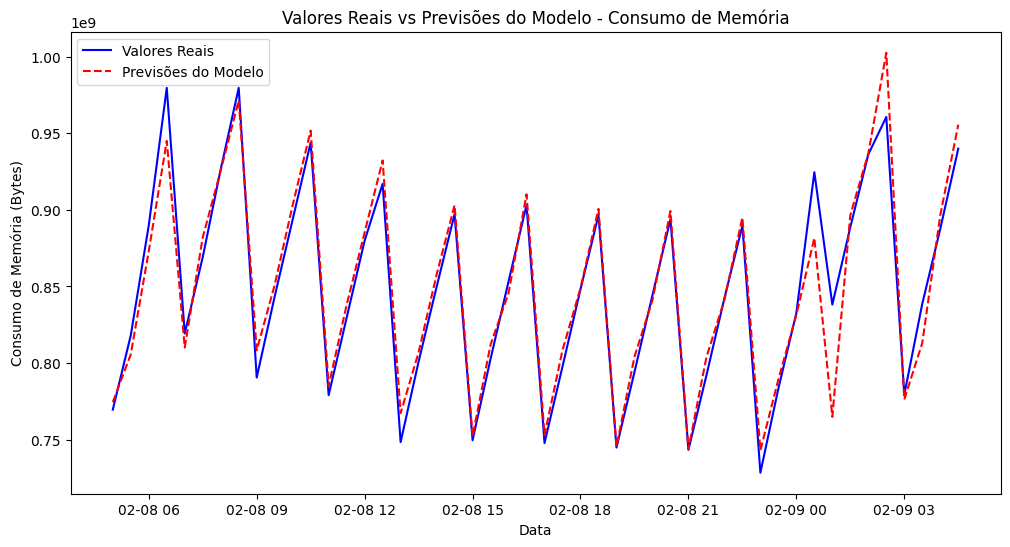

In [5]:
# Função para calcular o R² com tratamento de NaN
def calculate_r2(y_true, y_pred):
    try:
        r2 = r2_score(y_true, y_pred)
        if np.isnan(r2):  # Verificar se o R² é NaN
            return 0  # Retornar 0 ou outro valor padrão caso o R² seja NaN
        return r2
    except:
        return 0  # Se ocorrer qualquer erro, retornar 0

# Função Objetivo que treina o modelo LSTM e retorna RMSE e R-squared
def objective_function(params):
    """
    Função objetivo para o MRFO.
    params: array-like, contendo os hiperparâmetros [lstm_units, dropout_rate, batch_size, learning_rate, n_steps, epochs]
    Retorna: RMSE do modelo treinado com os hiperparâmetros especificados.
    """
    # Garantir que lstm_units seja um valor inteiro e dentro dos limites
    lstm_units = max(50, min(150, int(params[0])))  # Limitar entre 50 e 150
    
    # Garantir que dropout_rate esteja entre 0 e 1
    dropout_rate = max(0, min(0.99, params[1]))  # Limitar entre 0 e 0.99
    
    # Garantir que batch_size seja um valor inteiro positivo adequado
    batch_size = max(16, min(128, int(params[2])))  # Garantir que seja pelo menos 16 e no máximo 128
    
    # Garantir que learning_rate esteja dentro dos limites
    learning_rate = max(0.0001, min(0.001, params[3]))  # Limitar a learning_rate entre 0.0001 e 0.001
    
    # Garantir que n_steps seja adequado e não maior que o conjunto de dados
    n_steps = max(10, min(min(len(train_scaled), len(test_scaled)) - 1, int(params[4])))  # Limitar o número de passos temporais entre 10 e o tamanho dos dados menos 1
    
    # Garantir que o número de épocas seja adequado
    epochs = max(10, min(200, int(params[5])))  # Limitar o número de épocas entre 10 e 200

    # Criar sequências de input data para treino
    X_train, y_train = [], []
    for i in range(n_steps, len(train_scaled)):
        X_train.append(train_scaled[i-n_steps:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape para 3D
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Criar sequências de input data para teste
    X_test, y_test = [], []
    for j in range(n_steps, len(test_scaled)):
        X_test.append(test_scaled[j-n_steps:j, 0])
        y_test.append(test_scaled[j, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape para 3D, desde que o X_test tenha dados suficientes
    if X_test.shape[0] > 0:
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    else:
        return float("inf"), float("inf"), float("inf"), float("inf")  # Retornar valor alto para indicar erro

    # Iniciar um experimento no MLflow para cada execução
    mlflow.set_experiment("Otimização com MRFO - LSTM - 01")

    with mlflow.start_run():
        # Registrar um conjunto de tags (opcional)
        mlflow.set_tag("modelo", "LSTM")
        mlflow.set_tag("otimização", "MRFO")
        mlflow.set_tag("versão", "v1.0")

        # Definir o modelo com os hiperparâmetros especificados
        model = Sequential()
        model.add(LSTM(lstm_units, activation='tanh', input_shape=(n_steps, 1), return_sequences=True))
        model.add(Dropout(dropout_rate))
        model.add(LSTM(lstm_units, activation='tanh'))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1))

        # Compilar o modelo com o otimizador Adam e a taxa de aprendizado especificada
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss='mse')

        # Treinar o modelo
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

        # Fazer previsões e calcular o RMSE, MSE, R-squared e MAE
        test_pred = model.predict(X_test)
        test_pred = scaler.inverse_transform(test_pred)
        rmse = np.sqrt(mean_squared_error(test.values[n_steps:], test_pred))
        mse = mean_squared_error(test.values[n_steps:], test_pred)
        r2 = calculate_r2(test.values[n_steps:], test_pred)  # Usar a função ajustada para calcular R²
        mae = mean_absolute_error(test.values[n_steps:], test_pred)

        # Registrar os hiperparâmetros no MLflow
        mlflow.log_param("lstm_units", lstm_units)
        mlflow.log_param("dropout_rate", dropout_rate)
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("n_steps", n_steps)
        mlflow.log_param("epochs", epochs)
        
        # Registrar as métricas no MLflow
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        # Salvar o modelo no MLflow
        mlflow.keras.log_model(model, "model")

    return rmse, mse, r2, mae

# Implementação do Algoritmo Manta Ray Foraging Optimization (MRFO)
class MRFO:
    def __init__(self, obj_func, dim, SearchAgents_no, max_iter, lb, ub):
        self.obj_func = obj_func  # Função objetivo a ser minimizada
        self.dim = dim  # Dimensionalidade do problema (número de hiperparâmetros)
        self.SearchAgents_no = SearchAgents_no  # Número de agentes (manta rays)
        self.max_iter = max_iter  # Número máximo de iterações
        self.lb = lb  # Limites inferiores dos parâmetros
        self.ub = ub  # Limites superiores dos parâmetros

        # Inicialização das posições dos agentes
        self.positions = np.random.uniform(0, 1, (self.SearchAgents_no, self.dim)) * (self.ub - self.lb) + self.lb
        self.fitness = np.array([self.obj_func(self.clip_params(ind))[0] for ind in self.positions])

        # Encontrar a melhor posição inicial
        self.best_idx = np.argmin(self.fitness)
        self.gbest = self.positions[self.best_idx].copy()
        self.gbest_fitness = self.fitness[self.best_idx]

    def clip_params(self, params):
        """
        Função auxiliar para garantir que os parâmetros fiquem dentro dos limites definidos.
        """
        params[0] = max(50, min(150, params[0]))  # LSTM units
        #params[1] = max(0, min(1, params[1]))  # Dropout rate
        params[1] = max(0, min(0.99, params[1]))  # Garantir que dropout_rate seja no máximo 0.99
        params[2] = max(16, min(128, params[2]))  # Batch size
        params[3] = max(0.0001, min(0.001, params[3]))  # Learning rate
        params[4] = max(10, min(min(len(train_scaled), len(test_scaled)) - 1, params[4]))  # n_steps
        params[5] = max(10, min(200, params[5]))  # epochs
        return params

    def chain_foraging(self, i):
        """Implementação da fase de Chain Foraging"""
        r = np.random.rand(self.dim)
        self.positions[i] = self.positions[i] + r * (self.gbest - self.positions[i])
        self.positions[i] = self.clip_params(self.positions[i])

    def cyclone_foraging(self, i, t, max_iter):
        """Implementação da fase de Cyclone Foraging"""
        r = np.random.rand(self.dim)
        A = 2 * (1 - t / max_iter)  # Fator de controle que diminui ao longo das iterações
        direction = np.random.choice([-1, 1], size=self.dim)  # Escolher aleatoriamente o sentido (horário/anti-horário)
        self.positions[i] = self.positions[i] + A * direction * r * (self.gbest - self.positions[i])
        self.positions[i] = self.clip_params(self.positions[i])

    def somersault_foraging(self, i):
        """Implementação da fase de Somersault Foraging"""
        S = 2 * np.random.rand(self.dim) - 1  # Vetor aleatório entre -1 e 1
        somersault_factor = 2  # Fator que controla a magnitude do somersault
        self.positions[i] = self.positions[i] + somersault_factor * (S * self.gbest - self.positions[i])
        self.positions[i] = self.clip_params(self.positions[i])

    def optimize(self):
        for t in range(self.max_iter):
            for i in range(self.SearchAgents_no):
                # Escolher aleatoriamente uma fase de forrageamento a ser aplicada
                if np.random.rand() < 0.5:
                    self.chain_foraging(i)
                else:
                    self.cyclone_foraging(i, t, self.max_iter)

                # Avaliar a nova posição
                fitness_candidate = self.obj_func(self.clip_params(self.positions[i]))[0]

                # Atualizar a posição e a melhor solução encontrada
                if fitness_candidate < self.fitness[i]:
                    self.fitness[i] = fitness_candidate
                    if fitness_candidate < self.gbest_fitness:
                        self.gbest_fitness = fitness_candidate
                        self.gbest = self.positions[i].copy()

            # Somersault Foraging aplicado a todos os agentes uma vez por iteração
            for i in range(self.SearchAgents_no):
                self.somersault_foraging(i)

            print(f"Iteração {t+1}/{self.max_iter}, Melhor Fitness (RMSE): {self.gbest_fitness:.4f}")

        return self.gbest, self.gbest_fitness

# Definir os limites dos hiperparâmetros
dim = 6  # Agora com 6 hiperparâmetros (lstm_units, dropout_rate, batch_size, learning_rate, n_steps, epochs)
SearchAgents_no = 10  # Número de agentes (mantas)
max_iter = 20  # Número máximo de iterações

# Limites para cada hiperparâmetro
lb = np.array([50, 0.2, 32, 0.0001, 10, 10])  # Limites inferiores
ub = np.array([150, 0.5, 128, 0.001, 100, 200])  # Limites superiores

# Inicializar o algoritmo MRFO
mrfo = MRFO(objective_function, dim, SearchAgents_no, max_iter, lb, ub)

# Executar a otimização
best_params, best_fitness = mrfo.optimize()

# Obter as métricas para o melhor conjunto de hiperparâmetros
best_rmse, best_mse, best_r2, best_mae = objective_function(best_params)

# Imprimir os melhores hiperparâmetros com base no RMSE
print(f"\nMelhores Hiperparâmetros (baseado no RMSE):")
print(f"LSTM Units: {int(best_params[0])}")
print(f"Dropout Rate: {best_params[1]:.2f}")
print(f"Batch Size: {int(best_params[2])}")
print(f"Learning Rate: {best_params[3]:.6f}")
print(f"n_steps: {int(best_params[4])}")
print(f"Épocas: {int(best_params[5])}")

# Imprimir as métricas para o melhor conjunto de hiperparâmetros
print(f"\nMétricas para o Melhor Conjunto de Hiperparâmetros:")
print(f"RMSE: {best_rmse:.4f}")
print(f"MSE: {best_mse:.4f}")
print(f"R-squared: {best_r2:.4f}")
print(f"MAE: {best_mae:.4f}")



# Reutilizar o melhor modelo com os melhores hiperparâmetros encontrados
def plot_model_predictions(best_params):
    # Extrair os melhores hiperparâmetros
    lstm_units = int(best_params[0])
    dropout_rate = best_params[1]
    batch_size = int(best_params[2])
    learning_rate = best_params[3]
    n_steps = int(best_params[4])
    epochs = int(best_params[5])

    # Criar as sequências de input data para treino
    X_train, y_train = [], []
    for i in range(n_steps, len(train_scaled)):
        X_train.append(train_scaled[i-n_steps:i, 0])
        y_train.append(train_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    # Reshape para 3D
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Criar sequências de input data para teste
    X_test, y_test = [], []
    for j in range(n_steps, len(test_scaled)):
        X_test.append(test_scaled[j-n_steps:j, 0])
        y_test.append(test_scaled[j, 0])
    X_test, y_test = np.array(X_test), np.array(y_test)

    # Reshape para 3D
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Definir o modelo com os melhores hiperparâmetros
    model = Sequential()
    model.add(LSTM(lstm_units, activation='tanh', input_shape=(n_steps, 1), return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units, activation='tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    # Compilar o modelo com o otimizador Adam e a taxa de aprendizado especificada
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    # Treinar o modelo
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # Fazer previsões no conjunto de teste
    test_pred = model.predict(X_test)
    test_pred = scaler.inverse_transform(test_pred)

    # Visualização dos resultados
    plt.figure(figsize=(12, 6))

    # Plotar os valores reais de consumo de memória
    plt.plot(test.index[n_steps:], test.values[n_steps:], label="Valores Reais", color='blue')

    # Plotar as previsões do modelo
    plt.plot(test.index[n_steps:], test_pred, label="Previsões do Modelo", color='red', linestyle='--')

    # Adicionar título e legendas
    plt.title("Valores Reais vs Previsões do Modelo - Consumo de Memória")
    plt.xlabel("Data")
    plt.ylabel("Consumo de Memória (Bytes)")
    plt.legend()

    # Exibir o gráfico
    plt.show()

# Chamar a função com os melhores parâmetros encontrados
plot_model_predictions(best_params)
